In [1]:
# Programming a kernel density with bootstraped confidence intervals #

# Data : CPS 1985, AER package #

In [2]:
# Let's load some useful packages and the CPS dataset

options(warn = -1)
suppressMessages(library(AER))
suppressMessages(library(dplyr))

data("CPS1985")

In [3]:
# Now we can take a look on our data

head(CPS1985)

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
1,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1100,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes
5,13.07,13,9,28,cauc,other,male,worker,other,yes,no


In [4]:
# As we just want to estimate kernel density of womens' wages we  have to select that variable

CPS1985 %>% 
  filter(gender == "female") %>% 
  select(wage) %>% 
  transmute(lwage = log(wage)) -> siopa

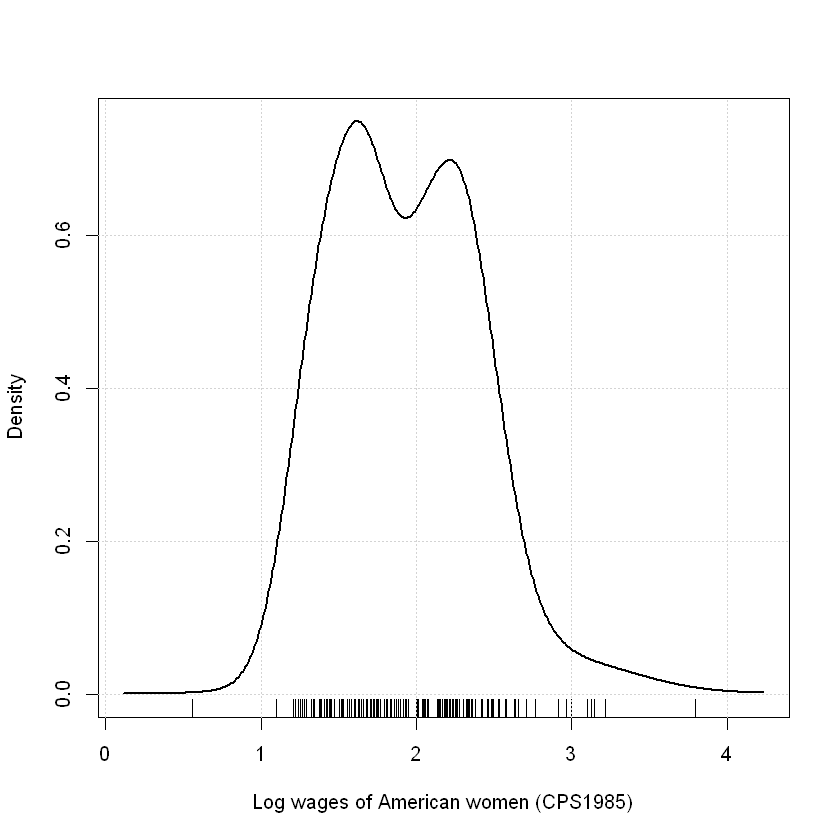

In [5]:
# Let's make a first graph of womens' log wages density
zmienna = siopa$lwage
densityPlot(zmienna, xlab = "Log wages of American women (CPS1985)")

#NOTE: By default we use gaussian kernel #

In [6]:
# Now we will set the necessary parameters

N <- nrow(siopa) #number of observations
B <- 100 # how many bootstrap replication
n = 500 # number of point our loop is going to evaluate

In [7]:
# Now let's create matrices where our loop is going to store results

z = matrix(nrow = N, ncol = B, NA)
dens = matrix(nrow = n, ncol = B, NA)

# The core part - loop

for (ii in 1:B){
  for (jj in 1:N){
    liczba = ceiling(runif(1)*N)
    z[jj,ii] = zmienna[liczba]
    
    
  }
  outcome <- density(z[,ii],from = 0, to = 4, n = n)
  dens[,ii] = outcome$y
  
}

In [8]:
# Yet we need to rearrange outcomes and calculate necessary statistics

space<-outcome$x # Those are points at which density was evaluated

est<- rowMeans(dens) # Average density value at given points

bounds <-t(apply(dens, 1, quantile, c(0.025, 0.975))) # We cut off lowwer and upper 2,5%

colnames(bounds)<-c("lowwer", "upper")
df <- as.data.frame(cbind(space, est, bounds))

In [9]:
# We have to rearrange data for plotting purposes

library(reshape2)
e1 <- melt(df, id.vars = "space")

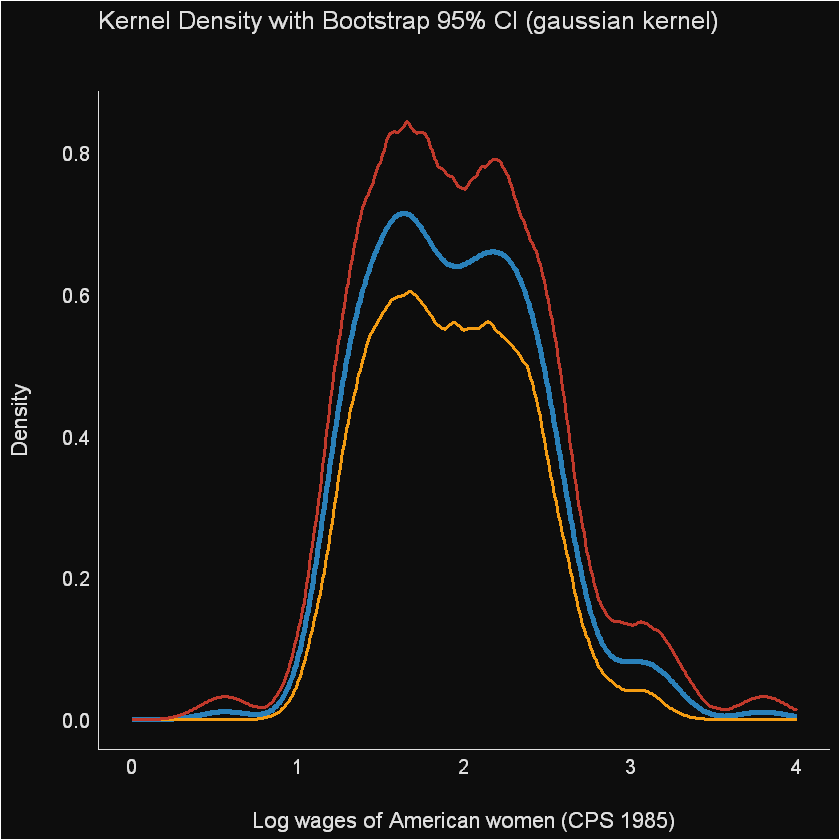

In [10]:
# Ok, last thing remaining is to plot our results!
library(ggplot2)
library(see)

f <- ggplot(e1, aes(space, value))
f + geom_line(aes(col = variable, size = variable))+
  scale_color_flat_d() +
  labs(title = "Kernel Density with Bootstrap 95% CI (gaussian kernel) \n", x = "Log wages of American women (CPS 1985)", y = "Density", color = "") +
  scale_size_manual(values = c(1.5, 1, 1))+
  theme_blackboard()+
  theme(legend.position="none")

# Does the black background look good? Not quite sure...

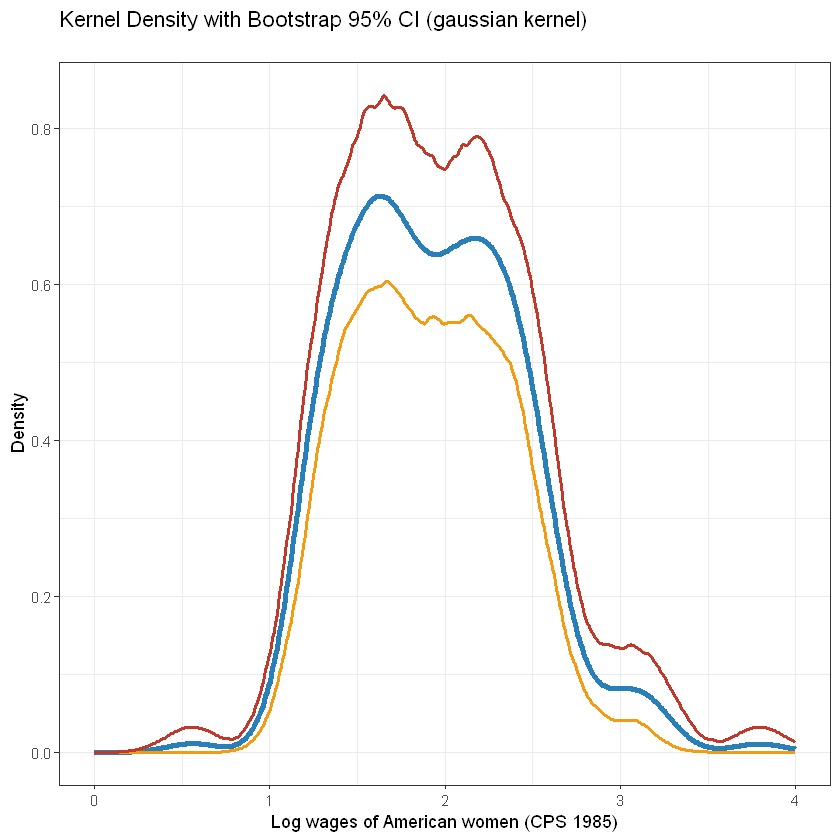

In [11]:
# Maybe the white one looks better (?) #

f + geom_line(aes(col = variable, size = variable))+
  scale_color_flat_d() +
  labs(title = "Kernel Density with Bootstrap 95% CI (gaussian kernel) \n", x = "Log wages of American women (CPS 1985)", y = "Density", color = "") +
  scale_size_manual(values = c(1.5, 1, 1))+
  theme_bw()+
  theme(legend.position="none")